**House price prediction:**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.


With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


**Practice Skills:**
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

**Acknowledgments**

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

Photo by Tom Thain on Unsplash.

**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

**Importing the data**

In [ ]:
df = pd.read_csv('train.csv') 

**Exploring the data**

In [ ]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


**How many features and observations inside the date**

In [ ]:
df.shape

(1460, 81)

**Well, let's get an overview about the correlation values between coulmns in our data**

In [ ]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


** Statistical analysis of our data**

In [ ]:
df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


**Let's Explore our target coulmn to see if it is normalized or not.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


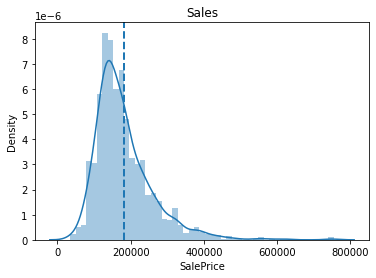

In [ ]:
#checking the target variables for distribution
sns.distplot(df['SalePrice'])
plt.axvline(x=df['SalePrice'].mean(), linestyle='--', linewidth=2)
plt.title('Sales');

**Exploring null values and visualizing it**

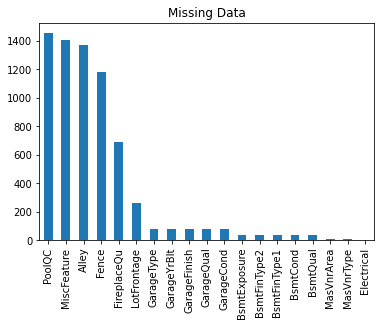

In [ ]:
#checking missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing.plot.bar()
plt.title('Missing Data');

**Visualizing your data correlation using heatmap ***

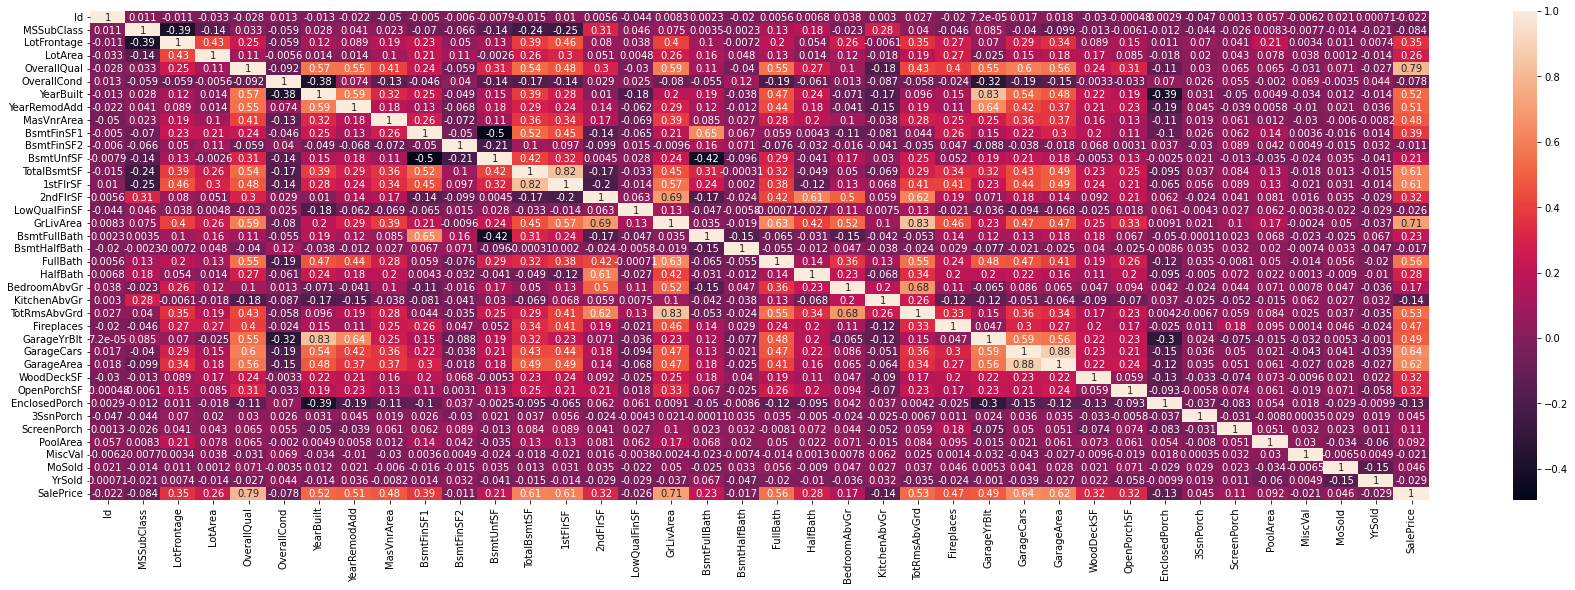

In [ ]:
plt.figure(figsize=(30,9))
sns.heatmap(df.corr(),annot=True)

**Splitting the data into features and target or X and y.**

In [ ]:
# droping values more than 50%

y = df['SalePrice']
house = df.drop(['Id','Alley','PoolQC','Fence','MiscFeature','SalePrice'],axis=1)
#house_test = dft.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1)

**Splitting the data into numerical and categorical data**

In [ ]:
num_cols = [col for col in house.columns if house[col].dtype in ['float64','int64']]
cat_cols = [col for col in house.columns if house[col].dtype not in ['float64','int64']]

*** Now, it is time for transforming our data to clean version of it by inputting null values and normalizing it and transforming categorical values to numerical values ***

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

house[num_cols] = SimpleImputer().fit_transform(house[num_cols])

house[num_cols] = MinMaxScaler().fit_transform(house[num_cols])

In [ ]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond',
                'MasVnrType','Electrical','MSZoning','Utilities','Functional','Exterior2nd','KitchenQual','Exterior1st','SaleType']
house[columns_None] = house[columns_None].fillna('none')


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(house[cat_cols])
encoded_cols = list(encoder.get_feature_names(cat_cols))
house[encoded_cols] = encoder.transform(house[cat_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


*** Splitting the data into training and testing sets ***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create training and validation sets
X_train,X_test,y_train,y_test = train_test_split(house[num_cols + encoded_cols],
                                                 y,
                                                 test_size=0.25,
                                                 random_state=42)

*** Importing regression models from sklearn library ***

In [ ]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#making dictionary of models
models = {
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

**let's see which model will be the best for our data**

In [ ]:
#taking results from the models
model_results = []
model_names = []

# training the model with function
for name,model in models.items():
    a = model.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    
print(df_results)

                   Model                   RMSE
6       LinearRegression  38291639504604.492188
0                    SVR           84754.145879
3             ElasticNet           49484.282352
4           SGDRegressor           30983.913596
5          BayesianRidge           29435.276084
2                  Ridge           28591.810149
7  RandomForestRegressor            27290.74333
1           XGBRegressor           26716.156399


In [ ]:
#!pip install optuna

In [ ]:
#taking best params
best_params = {'lambda': 3.559040735218393,
 'alpha': 0.25772549522868987,
 'colsample_bytree': 0.6,
 'subsample': 0.5,
 'learning_rate': 0.014,
 'n_estimators': 4000,
 'max_depth': 11,
 'random_state': 24,
 'min_child_weight': 3}

In [ ]:
#applying it in the model
XGBR = XGBRegressor(**best_params)

XGBR.fit(X_train, y_train)
predicted = XGBR.predict(X_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)}')

Root Mean Square Error test = 22865.357601403433


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, predicted))

0.9253673786075908


In [ ]:
!pip install tpot

In [ ]:
from tpot import TPOTRegressor

In [ ]:
pipeline_optimizer = TPOTRegressor(generations=20, population_size=20, cv=5,n_jobs=-1,scoring='r2',
                                    random_state=42, verbosity=2, warm_start=True)

In [27]:
pipeline_optimizer.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/420 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8120337520565393

Generation 2 - Current best internal CV score: 0.8120337520565393

Generation 3 - Current best internal CV score: 0.8186493711992651

Generation 4 - Current best internal CV score: 0.8316014022923653

Generation 5 - Current best internal CV score: 0.8495061001099653

Generation 6 - Current best internal CV score: 0.8506942162859292

Generation 7 - Current best internal CV score: 0.8515624073993173

Generation 8 - Current best internal CV score: 0.8515624073993173

Generation 9 - Current best internal CV score: 0.8540812575821592

Generation 10 - Current best internal CV score: 0.8540812575821592

Generation 11 - Current best internal CV score: 0.8540812575821592

Generation 12 - Current best internal CV score: 0.8569407764610706

Generation 13 - Current best internal CV score: 0.8569407764610706

Generation 14 - Current best internal CV score: 0.8569407764610706

Generation 15 - Current best internal CV score: 0.856947

TPOTRegressor(generations=20, n_jobs=-1, population_size=20, random_state=42,
              scoring='r2', verbosity=2, warm_start=True)

In [28]:
print(pipeline_optimizer.score(X_test, y_test))

0.8991900437770095


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  "X does not have valid feature names, but"
